In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [2]:
df = pd.read_csv('C:/Users/ANKUR/Desktop/iNeuron/EDA/AlgerialForestFire/Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
df.shape
df['Region']=1
df.shape
df.loc[:121]['Region']=0
df.shape
df=df.drop(df.index[123])
df=df.drop(df.index[122])
df.shape
df = df.reset_index()

(246, 14)

(246, 15)

(246, 15)

(244, 15)

In [4]:
df.shape
df=df.drop(df.index[123])
df=df.drop(df.index[122])
df.shape
df=df.rename(columns = {'Rain ':'Rain','Classes  ': 'Classes1',' RH':'RH',' Ws':'Ws'})
df.columns
df = df.reset_index()
df['Classes1_num']=df['Classes1']

df['Classes1_num'].replace(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ','not fire     ', 'not fire    ']
                         ,[0,1,1,1,0,0,0,0],inplace=True)

(244, 16)

(242, 16)

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes1', 'Region'],
      dtype='object')

In [5]:
df.isnull().sum()
df.shape
df.dropna(inplace=True)
df.shape

df['Classes1_num']=df['Classes1_num'].astype(int)

df.isnull().sum().sum()

df.shape
df.drop(['index'],axis=1,inplace=True)
df.shape

df=df.astype({'Temperature':'int','RH':'int','Ws':'int','Rain':'float','FFMC':'float','DMC':'float',
             'DC':'float','ISI':'float','BUI':'float','FWI':'float'})

level_0         0
index           0
day             0
month           0
year            0
Temperature     0
RH              0
Ws              0
Rain            0
FFMC            0
DMC             0
DC              0
ISI             0
BUI             0
FWI             0
Classes1        1
Region          0
Classes1_num    1
dtype: int64

(242, 18)

(241, 18)

0

(241, 18)

(241, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   level_0       241 non-null    int64  
 1   day           241 non-null    object 
 2   month         241 non-null    object 
 3   year          241 non-null    object 
 4   Temperature   241 non-null    int32  
 5   RH            241 non-null    int32  
 6   Ws            241 non-null    int32  
 7   Rain          241 non-null    float64
 8   FFMC          241 non-null    float64
 9   DMC           241 non-null    float64
 10  DC            241 non-null    float64
 11  ISI           241 non-null    float64
 12  BUI           241 non-null    float64
 13  FWI           241 non-null    float64
 14  Classes1      241 non-null    object 
 15  Region        241 non-null    int64  
 16  Classes1_num  241 non-null    int32  
dtypes: float64(7), int32(4), int64(2), object(4)
memory usage: 30.1+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
level_0,241.0,121.311203,70.964829,0.0,60.0,120.0,183.0,243.0
Temperature,241.0,32.161826,3.640449,22.0,30.0,32.0,35.0,42.0
RH,241.0,61.958506,14.861525,21.0,52.0,63.0,74.0,90.0
Ws,241.0,15.518672,2.809334,6.0,14.0,15.0,17.0,29.0
Rain,241.0,0.749793,2.000607,0.0,0.0,0.0,0.5,16.8
FFMC,241.0,78.020332,14.274480,28.6,72.6,83.7,88.3,96.0
DMC,241.0,14.780913,12.395199,0.7,5.8,11.3,20.9,65.9
DC,241.0,49.774689,47.712892,6.9,14.7,33.4,71.0,220.4
ISI,241.0,4.776763,4.154190,0.0,1.4,3.5,7.3,19.0
BUI,241.0,16.805394,14.231143,1.1,6.1,12.5,22.9,68.0


<Figure size 1008x504 with 0 Axes>

<AxesSubplot:>

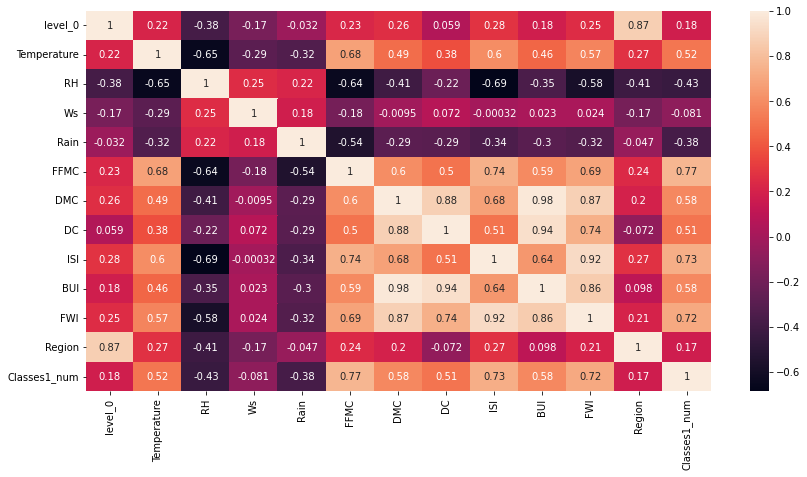

In [10]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)

In [14]:
df.corr()>0.94

,level_0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes1_num
level_0,True,False,False,False,False,False,False,False,False,False,False,False,False
Temperature,False,True,False,False,False,False,False,False,False,False,False,False,False
RH,False,False,True,False,False,False,False,False,False,False,False,False,False
Ws,False,False,False,True,False,False,False,False,False,False,False,False,False
Rain,False,False,False,False,True,False,False,False,False,False,False,False,False
FFMC,False,False,False,False,False,True,False,False,False,False,False,False,False
DMC,False,False,False,False,False,False,True,False,False,True,False,False,False
DC,False,False,False,False,False,False,False,True,False,True,False,False,False
ISI,False,False,False,False,False,False,False,False,True,False,False,False,False
BUI,False,False,False,False,False,False,True,True,False,True,False,False,False


In [15]:
df.columns

Index(['level_0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes1', 'Region',
       'Classes1_num'],
      dtype='object')

In [16]:
df.head()

,level_0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes1,Region,Classes1_num
0,0,01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0
4,4,05,06,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0


In [24]:
X = df[['RH','Ws','Rain','FFMC','DMC','DC','FWI']]
y = df['Temperature']

In [25]:
X.head()
y.head()

,RH,Ws,Rain,FFMC,DMC,DC,FWI
0,57,18,0.0,65.7,3.4,7.6,0.5
1,61,13,1.3,64.4,4.1,7.6,0.4
2,82,22,13.1,47.1,2.5,7.1,0.1
3,89,13,2.5,28.6,1.3,6.9,0.0
4,77,16,0.0,64.8,3.0,14.2,0.5


0    29
1    29
2    26
3    25
4    27
Name: Temperature, dtype: int32

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state=10)

In [28]:
X_train.head(2)
X_test.head(2)
y_train.head(2)
y_test.head(2)

,RH,Ws,Rain,FFMC,DMC,DC,FWI
25,64,18,0.0,86.8,17.8,71.8,10.6
119,47,14,0.7,77.5,7.1,8.8,0.9


,RH,Ws,Rain,FFMC,DMC,DC,FWI
83,53,16,0.0,89.5,37.6,161.5,22.3
76,61,18,0.3,80.2,11.7,90.4,4.2


25     31
119    32
Name: Temperature, dtype: int32

83    36
76    36
Name: Temperature, dtype: int32

In [29]:
# Standardize the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Linear Model

from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
reg_pred = regression.predict(X_test)

In [33]:
##Asumptions of lenear Model

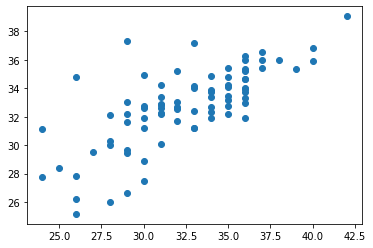

In [34]:
plt.scatter(y_test,reg_pred)

In [35]:
residuals = y_test-reg_pred
print(residuals)

83     1.328221
76     4.076541
61     2.028995
182    4.107757
106   -3.754452
         ...   
91     1.982614
235   -8.787925
206   -4.186545
213   -2.301277
78     2.716567
Name: Temperature, Length: 80, dtype: float64


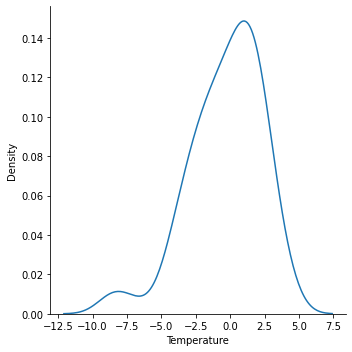

In [36]:
sns.displot(residuals, kind ="kde")

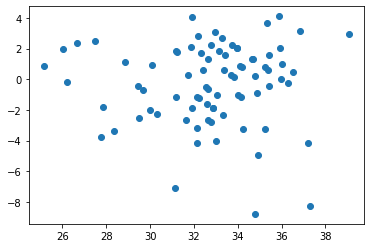

In [37]:
plt.scatter(reg_pred, residuals)

In [38]:
## Performance metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7.0077013395256085
2.066797690496992
2.64720632734315


In [39]:
# R square and Adjusted R square

from sklearn.metrics import r2_score

score = r2_score(y_test, reg_pred)
print(score)

0.5247757502202501


In [40]:
## Adjusted R square

1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.47857339260277454

In [41]:
#Ridge

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [44]:
# Assumption of Ridge
ridge_residuals = y_test-ridge_pred

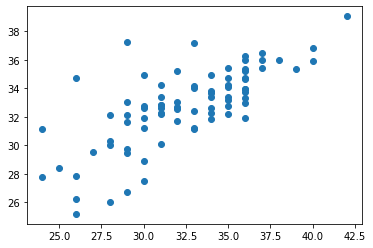

In [43]:
plt.scatter(y_test,ridge_pred)

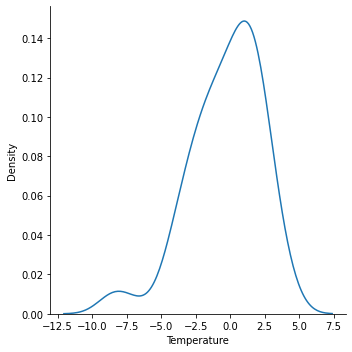

In [45]:
sns.displot(ridge_residuals, kind ="kde")

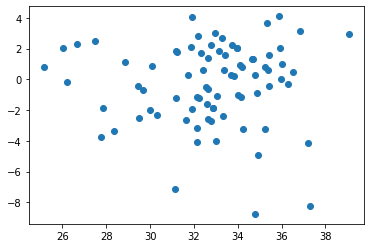

In [46]:
# Uniform distribution

plt.scatter(reg_pred, ridge_residuals)

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test, ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

6.9864313203287525
2.067831027296057
2.643185827808698


In [48]:
# Lasso
from sklearn.linear_model import Lasso
laso = Lasso()
laso.fit(X_train,y_train)
laso_pred = ridge.predict(X_test)
lasso_residuals = y_test-laso_pred

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

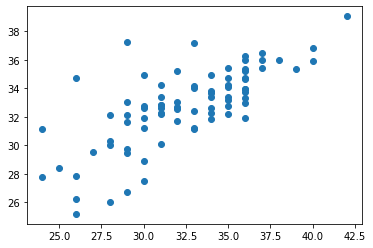

In [49]:
# Asusmtion
plt.scatter(y_test,laso_pred)

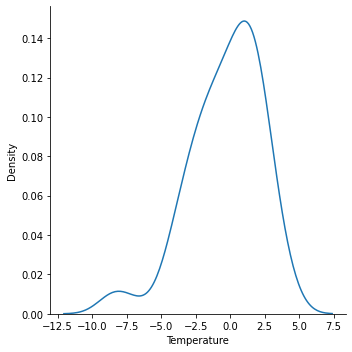

In [51]:
sns.displot(lasso_residuals, kind ="kde")

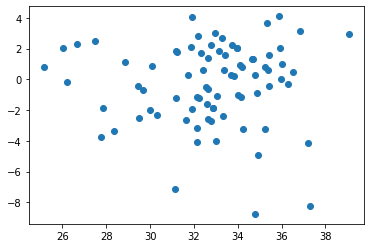

In [53]:
plt.scatter(reg_pred, lasso_residuals)

In [54]:
## Performance metrics for lasso linear regression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test,laso_pred))
print(mean_absolute_error(y_test, laso_pred))
print(np.sqrt(mean_squared_error(y_test,laso_pred)))

6.9864313203287525
2.067831027296057
2.643185827808698


In [55]:
#ElasticNet

from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train,y_train)
elastic_pred = ridge.predict(X_test)
#residuals
elastic_residuals = y_test-elastic_pred

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

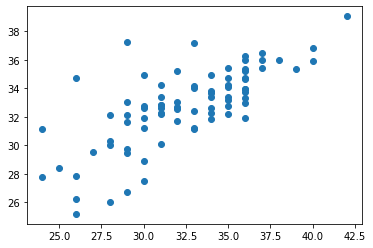

In [56]:
plt.scatter(y_test,elastic_pred)

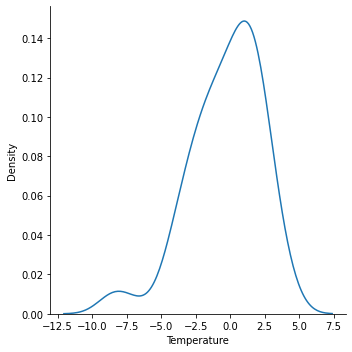

In [57]:
sns.displot(elastic_residuals, kind ="kde")

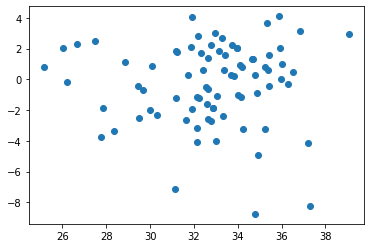

In [58]:
plt.scatter(reg_pred, elastic_residuals)


In [59]:
## Performance metrics for lasso linear regression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test,elastic_pred))
print(mean_absolute_error(y_test, elastic_pred))
print(np.sqrt(mean_squared_error(y_test,elastic_pred)))

6.9864313203287525
2.067831027296057
2.643185827808698
